In [148]:
import numpy as np
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 목표
- 머신러닝 전체과정을 정리해보자
- 타이타닉 데이터를 학습해서 생존자/사망자 예측하기

### 머신러닝 과정
1. 문제정의
2. 데이터수집
3. 데이터전처리
4. EDA(탐색적 데이터 분석)
5. 모델선택 및 하이퍼파라미터 튜닝
6. 모델학습
7. 모델평가
8. 서비스화(Web)

## 1.문제정의
- 탑승객의 정보를 바탕으로 생존자/사망자 판단(지도학습,분류)
- Kaggle에서 좋은 점수를 받기

## 2.데이터 수집
- Kaggle사이트로부터 train,test,gender_suvmission다운로드

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [151]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [152]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. 데이터 전처리
- 컬럼 삭제
- 결측치 채우기
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화(라벨인코딩, 원핫인코딩)

In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
# passenger id 삭제
# drop 사용
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)


In [156]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
#훈련세트 정답 분리
y_train = train['Survived']

In [158]:
# 결측지 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Embarked
- 결측지 채우기

In [159]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [160]:
#embarked 특서의 결측치 S로 채우기
# fillna 함수 활용
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)

In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [162]:
test.describe()
# std : 분산
# mean : 평균
# 50% : 중앙값
# 여기서 중앙값과 평균이 차이가 많이 나는걸 볼 수 있는데 이 이유는 max값과 같이 값자기 확 큰 수들이 들어 있기때문에, 
# 중앙값은 작게 나오지만 평균값은 크게 나오게 되는 것

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [163]:
# 중앙값으로 결측치 채우기
fare_median = test['Fare'].median()
test['Fare'].fillna(fare_median, inplace = True) 
# 결측치 채우는 함수 fillna, inplace = True 까지 해줘야 결측치 채워진 결과가 저장까지 됌
# 안그럼 채워서 보여주기만 하고 끝

In [164]:
test.info()
# 위에선 fare가 417로 결측치가 한개 있었지만, 채우고 난 뒤 418개가 된 것을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [165]:
# age 컬럼 채우기
# 특성간의 상관관계(범위 : -1 ~ 1, 절댓값이 1에 가까울 수록 상관관계가 높은 것)를 통해서 채우기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [166]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [167]:
train[['Pclass', 'Age']].groupby(by = 'Pclass').median() # median중앙값

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [168]:
# 남자는 많이 죽었고, 여자는 많이 살았기 때문에 성별로 한번 더 구분
age_table = train[['Pclass', 'Sex', 'Age']].groupby(by = ['Pclass', 'Sex']).median() 
# 먼저 적힌 Pclass로 한번 구분하고, 그 구분된 걸 'Sex'로 한번 더 구분

In [169]:
# age_table를 이용 여러가지로 잘라서 사용 가능
age_table.loc[3]

,Age
Sex,
female,21.5
male,25.0


In [170]:
age_table.loc[3, 'male']

Age    25.0
Name: (3, male), dtype: float64

In [171]:
age_table.loc[(3, 'male'), 'Age']

25.0

In [172]:
# person : train, test
def fill_age(person):
    # np.isnan : 한 행씩 가져와진 데이터에 결측치 있는지 검색
    if np.isnan(person['Age']):
        return age_table.loc[person['Pclass'],person['Sex']][0]
    else:
        return person['Age']

In [173]:
train['Age'] = train.apply(fill_age, axis = 1)
test['Age'] = test.apply(fill_age, axis = 1)

In [174]:
train.info()
# age의 결측치가 다 채워진 걸 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [175]:
# Cabin 결측치 채우기
# 결측치를 하나의 데이터로 활용
# Cabin의 범주가 너무 많기 때문에 종류를 줄여보자
## >> 모델이 복잡해지는것을 방지 : 과대적합 방지

In [176]:
# Cabin = 선실
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [177]:
train['Cabin'] = train['Cabin'].str[0]

In [178]:
test['Cabin'] = test['Cabin'].str[0]

In [179]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [180]:
train['Cabin'].fillna('M', inplace = True)
test['Cabin'].fillna('M', inplace = True)

In [181]:
# Cabin의 결측치들이 잘 채워진 것을 볼 수 있다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## 4. 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 분석
- seaborn 라이브러리 활용

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

### 범주형 데이터 시각화
- 빈도 기반의 그래프를 활용

##### Cabin 시각화

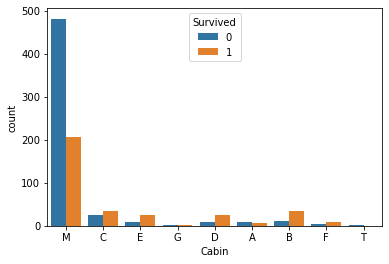

In [183]:
sns.countplot(data = train,
              x = 'Cabin',
              hue = 'Survived') # Cabin으로 한번 거르고, hue속성인 Survived로 한번 더 거름

In [184]:
# m에서 죽은 사람이 많기 때문에, 모델에 학습시켜도 의미가 있을 수도 있다.
# 하지만 결측치들을 모아서 처리해준게 M 이기 때문에 여러 기준들의 결측치들이 모여서 만들어졌기에 의미가 없을 수도 있다.

##### Pclass시각화

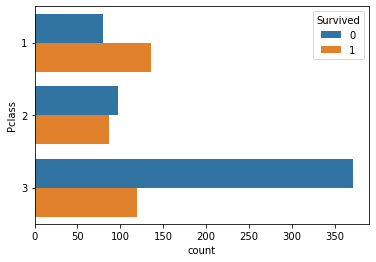

In [185]:
sns.countplot(data = train,
              y = 'Pclass',
              hue = 'Survived')

- 1등급 : 1(Survivied)이 조금 더 많다 = 1등급에 탑승하면 살 확률이 조금 더 높다
- 2등급 : 1과 0이 비슷하다 = 살 확률과 죽을 확률이 비슷하다
- 3등급 : 0값의 비율이 높음 = 죽을 확률이 높다
- Pclass를 모델에 사용해도 괜찮을 것이다

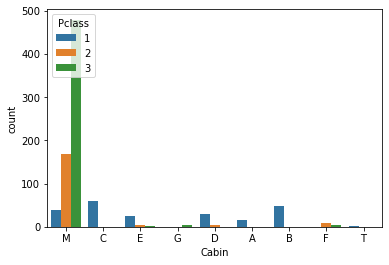

In [186]:
# Pclass 와 Cabin 시각화
sns.countplot(data = train,
             x = 'Cabin',
             hue = 'Pclass')

- A, B, C는 1등급 사람들만 탔다
- M은 3등급 사람들이 많이 탑승
- 내가 혼자 생각해본 분석 결과는 : M과 3등급이 있는 배의 부분이 살아남기 힘든 부분이었나 보다 싶음
- 명훈쌤 분석 결과 : 3등급 사람들이 많이 죽어서 그 정보가 많이 손실되었지 않을까? 라는 생각

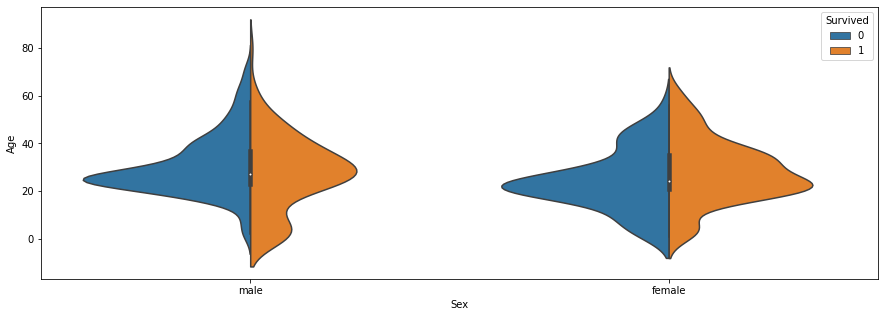

In [187]:
# Age 시각화
# violinplot
plt.figure(figsize = (15, 5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = 'True')

- 남자는 20대가 많이 죽었다
- 어린아이 중에서는 남자아이가 많이 살았다(시대적배경 추측 - 남아선호사상)

In [188]:
# Fare 시각화
# y축을 Fare로 바꾸기

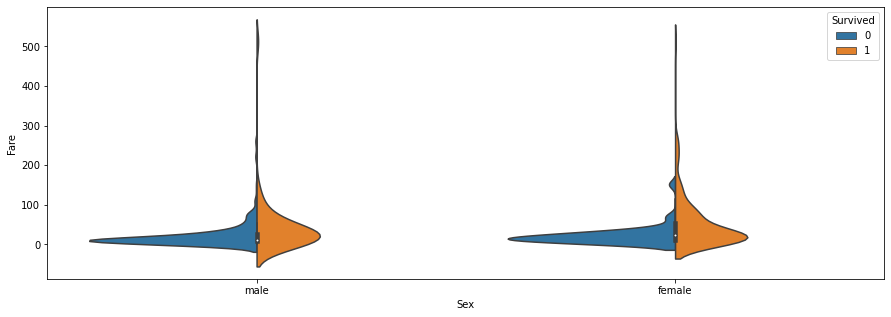

In [189]:
plt.figure(figsize = (15, 5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = 'True')

- 요금이 싼 사람들은 상대적으로 많이 죽었다
- 전체 요금이 0 ~ 40 달러 사이에 많이 분포되어있다
- 예측값이 낮게 나올땐 이상치(예를 들면 위 그래프에선 300~500대 구간 같은 아주 극히 낮은 수치들)를 삭제함으로써 예측값을 올리는 식으로도 할 수 있다.

In [190]:
# 특성공학
# 가족의 수에 따른 생존률
# Sibsp와 Parch룰 합쳐서 가족이라는 새로운 컬럼 생성
# Family_Size = Sibsp(형제자매) + Parch(부모자식) + 1(본인)
# 1. Family_Size 만들기
# 2. sns.countplot 사용해서 Family_Size에 따른 생존빈도수 확인

In [191]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1

In [192]:
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


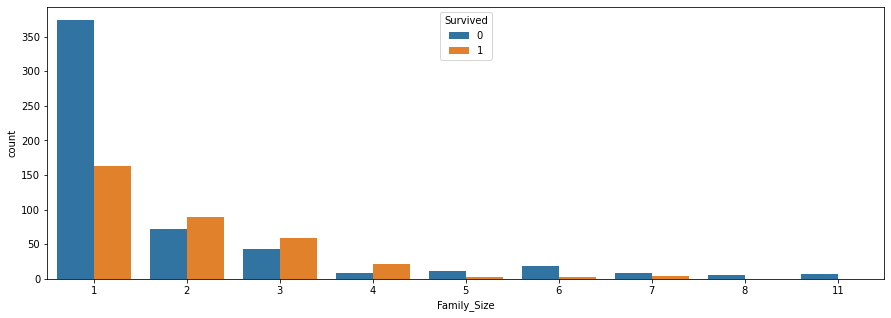

In [194]:
plt.figure(figsize = (15, 5))
sns.countplot(data = train,
              x = 'Family_Size',
              hue = 'Survived')

- 1명일때는 죽은 비율이 높다
- 2 ~ 4명일때는 살아남은 비율이 높다
- 5명 이상일때는 죽은 비율이 높다
- Family_Size라는 수치데이터를 그대로 써도 좋지만 범주형 데이터로도 변환해보자
- Binning(수치형 > 범주형)의 특징 : 사소한 관찰 오류를 줄여준다

In [195]:
# 가족 사이즈가 1이면 Alone, 2 ~ 4면 Samll, 5명 이상이면 Large범주로 변경
# cut함수 활용

In [196]:
bins = [0, 1, 4, 20] # 데이터를 잘라낼 구간 설정 (초과, 이하)
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름
train['Family_Group'] = pd.cut(x = train['Family_Size'], bins = bins, labels = labels)

In [197]:
test['Family_Group'] = pd.cut(x = test['Family_Size'], bins = bins, labels = labels)

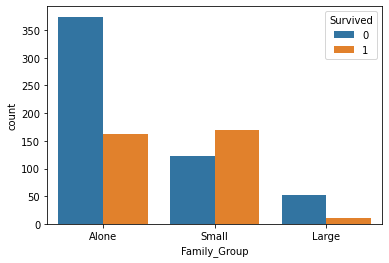

In [198]:
sns.countplot(data = train,
              x = 'Family_Group',
              hue = 'Survived')

- text데이터 다루기
- Name 컬럼 : 중간에 호칭을 뽑아서 정형화 시키기(Mr/Mrs/Miss 뽑아내기)

In [199]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [200]:
name_text = train['Name'][0]

In [201]:
name_text

'Braund, Mr. Owen Harris'

In [202]:
name_text.split(',')

['Braund', ' Mr. Owen Harris']

In [203]:
name_text.split(',')[1]

' Mr. Owen Harris'

In [204]:
name_text.split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [205]:
name_text.split(',')[1].split('.')[0]

' Mr'

In [206]:
# Mr 앞에 띄어쓰기 제거까지 해줌
name_text.split(',')[1].split('.')[0].strip()

'Mr'

In [207]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip() 

In [208]:
# apply() 함수 활용해서 적용하기
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [209]:
# apply함수
# 행과 열로 이루어진 데이터에서 함수를 쉽게 적용시키기 위해 쓰임
# 굳이 for문을 사용하지 않다고 전체 데이터 행들에 접근을 한다

In [210]:
train['Name'].apply(split_title)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [211]:
# 정형화된 Title 종류 확인해보기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [212]:
# Title 요소 갯수 확인
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
the Countess      1
Mme               1
Jonkheer          1
Ms                1
Lady              1
Sir               1
Capt              1
Name: Title, dtype: int64

- Mr, Miss, Mrs, Master는 남겨둠
- 나머지 호칭은 통합

In [213]:
# map 함수 사용
# Label Encoding

In [214]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [215]:
# S : 1
# C : 2
# Q : 3
train["Embarked"].map({'S' : 1, 'C' : 2, 'Q' : 3})

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    3
Name: Embarked, Length: 891, dtype: int64

In [216]:
title_dic = {
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Mme' : 'Miss',
    'Lady' : 'Miss',
    'Don' : 'Other',
    'Rev' : 'Other',
    'Dr' : 'Other',
    'Ms' : 'Miss',
    'Major' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

train['Title2'] = train['Title'].map(title_dic)
test['Title2'] = test['Title'].map(title_dic)

In [217]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [218]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

### 사용하지 않을 컬럼 정리

In [219]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [220]:
# name, ticket, title 컬럼 삭제
train.drop(['Name', 'Ticket', 'Title'], axis = 1, inplace = True)
test.drop(['Name', 'Ticket', 'Title'], axis = 1, inplace = True)

In [221]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    float64 
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Cabin         891 non-null    object  
 8   Embarked      891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title2        891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


In [223]:
pd.get_dummies(train['Title2'])
# 데이터들이 해당 값을 가지고 있으면 1, 아니면 0이 나타나게 한 것

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [224]:
# prefix를 입력하면 앞에 이름을 붙여줘서 구분이 가능하게 한다, 여러개의 데이터들을 쓸때는 구분하기 좋기 위해서 사용한다
pd.get_dummies(train['Title2'], prefix = 'Title2')

,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [225]:
categorical_features = ['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title2']

In [226]:
for feature_name in categorical_features :
    # 원핫 인코딩
    one_hot = pd.get_dummies(train[feature_name], prefix = feature_name)
    # 기존 글자 형태 컬럼 삭제
    train.drop(feature_name, axis = 1, inplace = True)
    # 기존 데이터에 원핫인코딩한 데이터 붙이기
    train = pd.concat([train, one_hot], axis = 1)

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Family_Size         891 non-null    int64  
 7   Sex_female          891 non-null    uint8  
 8   Sex_male            891 non-null    uint8  
 9   Cabin_A             891 non-null    uint8  
 10  Cabin_B             891 non-null    uint8  
 11  Cabin_C             891 non-null    uint8  
 12  Cabin_D             891 non-null    uint8  
 13  Cabin_E             891 non-null    uint8  
 14  Cabin_F             891 non-null    uint8  
 15  Cabin_G             891 non-null    uint8  
 16  Cabin_M 

In [228]:
for feature_name in categorical_features :
    # 원핫 인코딩
    one_hot = pd.get_dummies(test[feature_name], prefix = feature_name)
    # 기존 글자 형태 컬럼 삭제
    test.drop(feature_name, axis = 1, inplace = True)
    # 기존 데이터에 원핫인코딩한 데이터 붙이기
    test = pd.concat([test, one_hot], axis = 1)

In [229]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    float64
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Family_Size         418 non-null    int64  
 6   Sex_female          418 non-null    uint8  
 7   Sex_male            418 non-null    uint8  
 8   Cabin_A             418 non-null    uint8  
 9   Cabin_B             418 non-null    uint8  
 10  Cabin_C             418 non-null    uint8  
 11  Cabin_D             418 non-null    uint8  
 12  Cabin_E             418 non-null    uint8  
 13  Cabin_F             418 non-null    uint8  
 14  Cabin_G             418 non-null    uint8  
 15  Cabin_M             418 non-null    uint8  
 16  Embarked

In [230]:
train.shape

(891, 29)

In [231]:
test.shape

(418, 27)

In [232]:
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [233]:
# test에 Cabin_T 컬럼 만들고 0 값을 채운다

In [234]:
test['Cabin_T'] = 0

In [235]:
test['Cabin_T'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Cabin_T, Length: 418, dtype: int64>

# 5. 모델링
- 모델선택 및 하이퍼 파라미터 튜닝

In [243]:
train.shape

(891, 29)

In [244]:
test.shape

(418, 28)

In [245]:
# 데이터를 문제와 정답으로 분리해야 한다
# X_train : Survived 컬럼을 제외한 나머지 컬럼 사용
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()

In [246]:
# 주소값을 공유
X_test = test
# 둘 중에 하나만 값에 변화를 주어도 두 변수 값 모두 변함

In [247]:
# copy()
# 값은 그대로 넣어줌
# 주소값을 공유하지 않음
# X_test값에 변화를 주면 X_test값에만 변화가 나타남
X_test = test.copy()
# test원본은 그대로 있고 test의 복사본을 만들어 X_test와 공유한다고 생각

In [248]:
# 교차검증(Cross Validation)
# train을 train과 validation데이터로 나눔

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state = 5)
# X_train, Y_train 을 통해 학습
# X_val, Y_val 을 통해 점수 출력

### 모델 선택

In [250]:
# KNN 분류모델
from sklearn.neighbors import KNeighborsClassifier
# DecisionTree 분류모델
from sklearn.tree import DecisionTreeClassifier

In [251]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

# 6. 모델 학습

In [252]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
97,1,23.0,0,1,63.3583,2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
742,1,21.0,2,2,262.3750,5,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
754,2,48.0,1,2,65.0000,4,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
839,1,40.0,0,0,29.7000,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
184,3,4.0,0,2,22.0250,3,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,3,39.0,0,0,7.9250,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
118,1,24.0,0,1,247.5208,2,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
701,1,35.0,0,0,26.2875,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
206,3,32.0,1,0,15.8500,2,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [253]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [254]:
sc = knn_model.score(X_train, Y_train)
print("훈련 정확도 : ", sc)

훈련 정확도 :  0.7874251497005988


In [255]:
knn_pre = knn_model.predict(X_test)

In [256]:
knn_pre
# X_test에 대해 학습된 knn이 예측한 값

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [257]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [258]:
tree_pre = tree_model.predict(X_test)

In [259]:
tree_pre

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [260]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

### 교차검증

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
cross_val_score(knn_model, X_train, Y_train, cv = 5)

array([0.71641791, 0.76865672, 0.65671642, 0.77443609, 0.66165414])

In [268]:
cross_val_score(knn_model, X_train, Y_train, cv = 5).mean()

0.7155762540680058

### 하이퍼 파라미터 튜닝
- knn 모델에서 n_neighbors 1~ 150 중에서 가장 높은 train의 score를 기록한 값 찾기
- tree 모델에서 max_depth 1 ~ 150 중에서 가장 높은 train의 score를 기록한 값 찾기
- for문 사용
- list를 만들어서 어떤 숫자를 사용했는지, 그 숫자를 사용했을때의 평가값 저장
- dataframe으로 만들어서 max함수 적용

## 선생님 풀이

In [269]:
#scikit-learn 라이브러리를 임포트
from sklearn.neighbors import KNeighborsClassifier

In [270]:
knn_score_list = []


for i in range(1, 151):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_result = cross_val_score(knn_model, X_train, Y_train, cv = 5)
    knn_score_list.append([i, knn_result.mean()])
    
knn_score_pd = pd.DataFrame(knn_score_list)

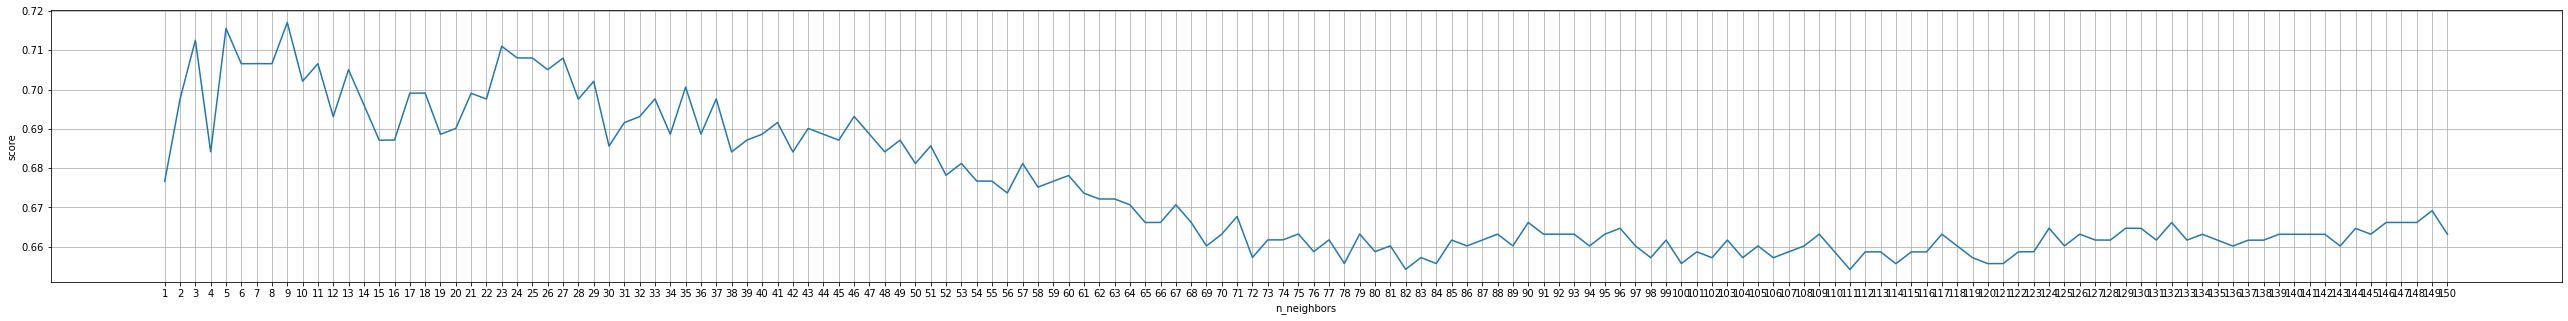

In [271]:
plt.figure(figsize = (45, 5))
plt.plot(knn_score_pd[0], knn_score_pd[1])
plt.xticks(knn_score_pd[0])
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [272]:
knn_score_pd

,0,1
0,1,0.676613
1,2,0.697565
2,3,0.712569
3,4,0.684154
4,5,0.715576
...,...,...
145,146,0.666165
146,147,0.666177
147,148,0.666165
148,149,0.669162


In [273]:
tree_score_list = []


for i in range(1, 151):
    tree_model = DecisionTreeClassifier(max_depth = i)
    tree_result = cross_val_score(tree_model, X_train, Y_train, cv = 5)
    tree_score_list.append([i, tree_result.mean()])
    
tree_score_pd = pd.DataFrame(tree_score_list)

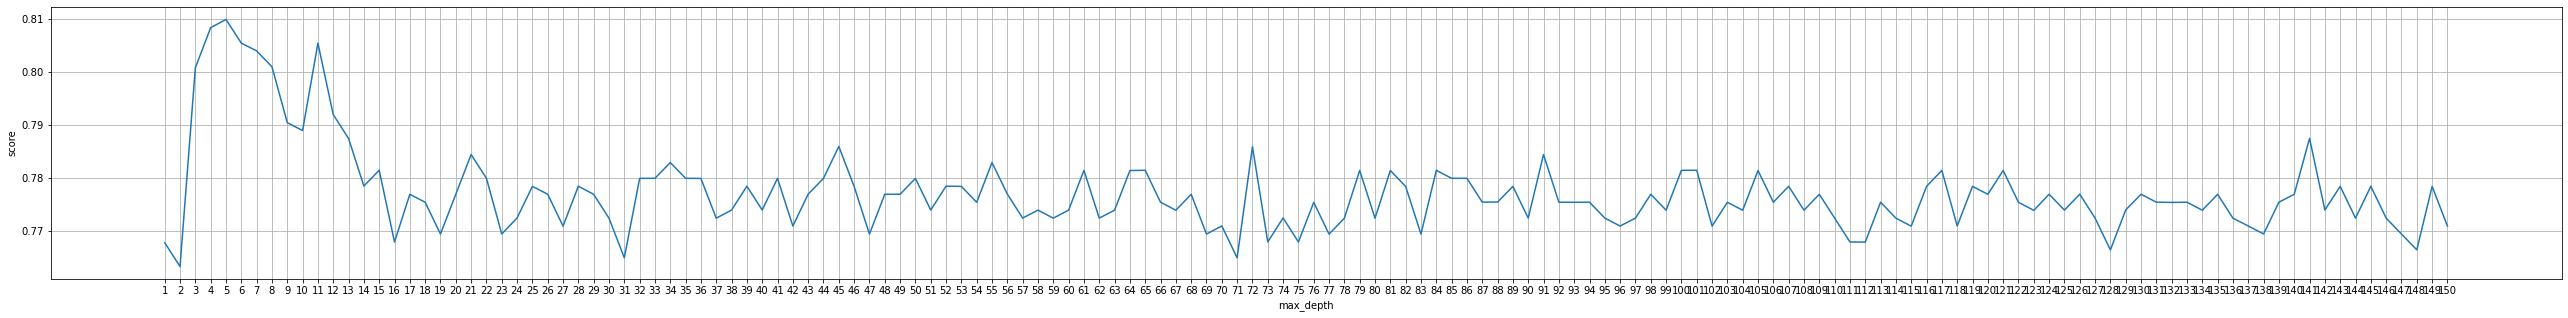

In [274]:
plt.figure(figsize = (45, 5))
plt.plot(tree_score_pd[0], tree_score_pd[1])
plt.xticks(tree_score_pd[0])
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

## 틀린 풀이

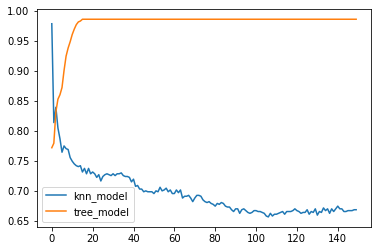

In [121]:
import pandas as pd
list = []
list2 = []
neighbors = range(1,151)
for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    list.append([knn_model.score(X_train, Y_train)])
    tree_model = DecisionTreeClassifier(max_depth = i)
    tree_model.fit(X_train, Y_train)
    list2.append([tree_model.score(X_train, Y_train)])
    
klist = pd.DataFrame(list)
tlist = pd.DataFrame(list2)

plt.plot(list, label = "knn_model")
plt.plot(list2, label = "tree_model")
plt.legend()

## 최종 모델 평가

In [275]:
final_knn = KNeighborsClassifier(n_neighbors = 9)
final_knn.fit(X_train, Y_train)

final_tree = DecisionTreeClassifier(max_depth = 5)
final_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [276]:
knn_pre = final_knn.predict(X_test)
tree_pre = final_tree.predict(X_test)

In [277]:
submission = pd.read_csv('gender_submission.csv')

In [278]:
submission['Survivied'] = tree_pre

In [279]:
submission.to_csv('tree_submission01.csv', index = False)

## 7. 모델평가

In [280]:
knn_pre = knn_model.predict

In [281]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=150)

In [282]:
knn_pre = knn_model.predict(X_val)

In [283]:
knn_pre

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [284]:
sc = knn_model.score(X_val, Y_val)

In [285]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=150)

In [286]:
tree_pre = tree_model.predict(X_val)

In [287]:
tree_pre

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [288]:
sc2 = tree_model.score(X_val, Y_val)

In [289]:
print("knn모델 score : ", sc)
print("tree모델 score : ", sc2)

knn모델 score :  0.6905829596412556
tree모델 score :  0.8071748878923767


# Ensemble

In [290]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [291]:
forest_model = RandomForestClassifier()
gradient_model = GradientBoostingClassifier()

In [314]:
# forest 특성
# max_depth
# n_estimators
# max_features
# max_leaf_nodes

In [293]:
X_train.shape, y_train.shape

((668, 28), (891,))

In [296]:
forest_model.fit(X_train, Y_train)
forest_model.score(X_train, Y_train)

0.9865269461077845

In [297]:
forest_model.score(X_val, Y_val)

0.8385650224215246

In [315]:
forest_model2 = RandomForestClassifier(n_estimators = 1000,
                                       max_features = 0.7,
                                       max_depth = 5,
                                       max_leaf_nodes = 50)

In [319]:
forest_model2.fit(X_train, Y_train)
forest_model2.score(X_train, Y_train)

0.8577844311377245

In [320]:
forest_model2.score(X_val, Y_val)

0.8565022421524664

In [325]:
forest_model3 = RandomForestClassifier(n_estimators = 10000,
                                       max_features = 7,
                                       max_depth = 50,
                                       max_leaf_nodes = 500)

forest_model3.fit(X_train, Y_train)
print(forest_model3.score(X_train, Y_train))
print(forest_model3.score(X_val, Y_val))

0.9865269461077845
0.8295964125560538


In [326]:
forest_model3 = RandomForestClassifier(n_estimators = 100,
                                       max_features = 0.07,
                                       max_depth = 0.5,
                                       max_leaf_nodes = 5)

forest_model3.fit(X_train, Y_train)
print(forest_model3.score(X_train, Y_train))
print(forest_model3.score(X_val, Y_val))

0.6122754491017964
0.6278026905829597


In [327]:
from sklearn.model_selection import GridSearchCV

In [333]:
param_grid = {
    'max_depth' : [5, 10, 15, 20],
    'n_estimators' : [1000, 1500, 2000, 2500],
    'max_features' : [0.5, 0.7],
    'max_leaf_nodes' : [20, 50, 80]
}

In [334]:
grid = GridSearchCV(forest_model2, param_grid, cv = 3) # 3겹의 교차검증도 같이 진행
grid.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.7,
                                              max_leaf_nodes=50,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'max_leaf_nodes': [20, 50, 80],
                         'n_estimators': [1000, 1500, 2000, 2500]})

In [335]:
print('best score : ', grid.best_score_)
print('best params : ', grid.best_params_)

best score :  0.8203046095422777
best params :  {'max_depth': 10, 'max_features': 0.7, 'max_leaf_nodes': 20, 'n_estimators': 1000}
